In [27]:
from statsforecast.utils import AirPassengersDF
df = AirPassengersDF.reset_index()
df

,ds,unique_id,y
0,1949-01-31,1.0,112.0
1,1949-02-28,1.0,118.0
2,1949-03-31,1.0,132.0
3,1949-04-30,1.0,129.0
4,1949-05-31,1.0,121.0
...,...,...,...
139,1960-08-31,1.0,606.0
140,1960-09-30,1.0,508.0
141,1960-10-31,1.0,461.0
142,1960-11-30,1.0,390.0


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import TimeSeriesSplit

In [29]:
# Load the data

df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)
ts = df['y']

In [30]:
df

,unique_id,y
ds,,
1949-01-31,1.0,112.0
1949-02-28,1.0,118.0
1949-03-31,1.0,132.0
1949-04-30,1.0,129.0
1949-05-31,1.0,121.0
...,...,...
1960-08-31,1.0,606.0
1960-09-30,1.0,508.0
1960-10-31,1.0,461.0


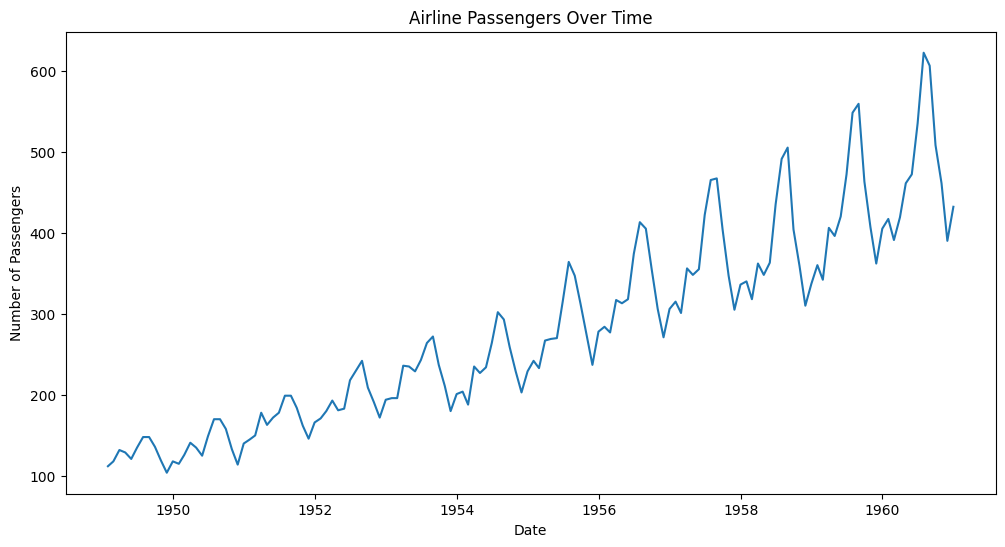

Checking for stationarity in the original time series:
ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


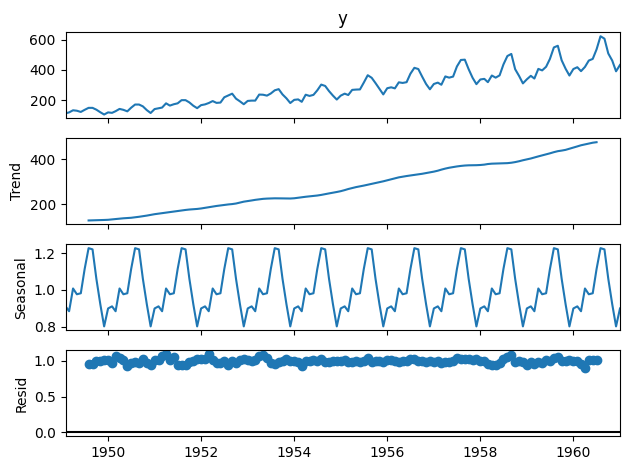

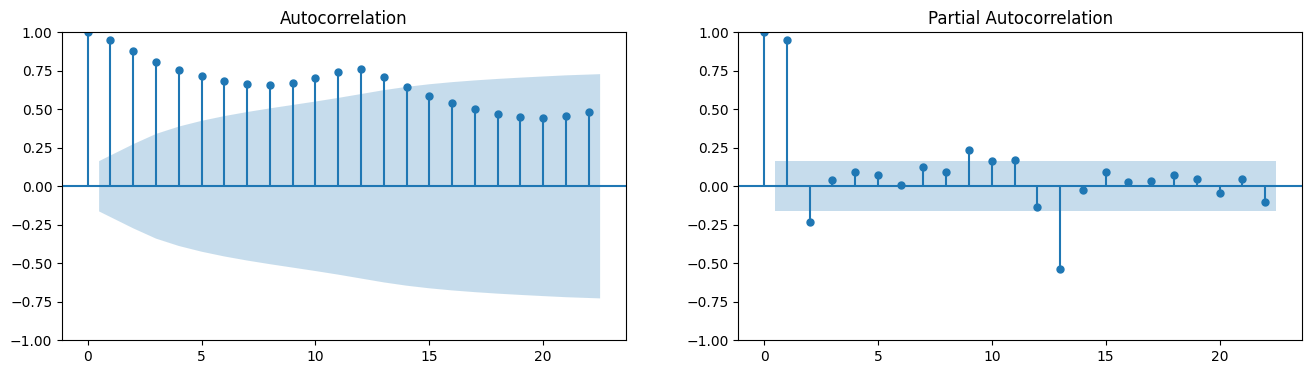

Testing for stationarity in the differenced time series:
ADF Statistic: -2.8292668241699923
p-value: 0.054213290283826474
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}

Testing for stationarity in the second-order differenced time series:
ADF Statistic: -16.384231542468516
p-value: 2.7328918500141235e-29
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


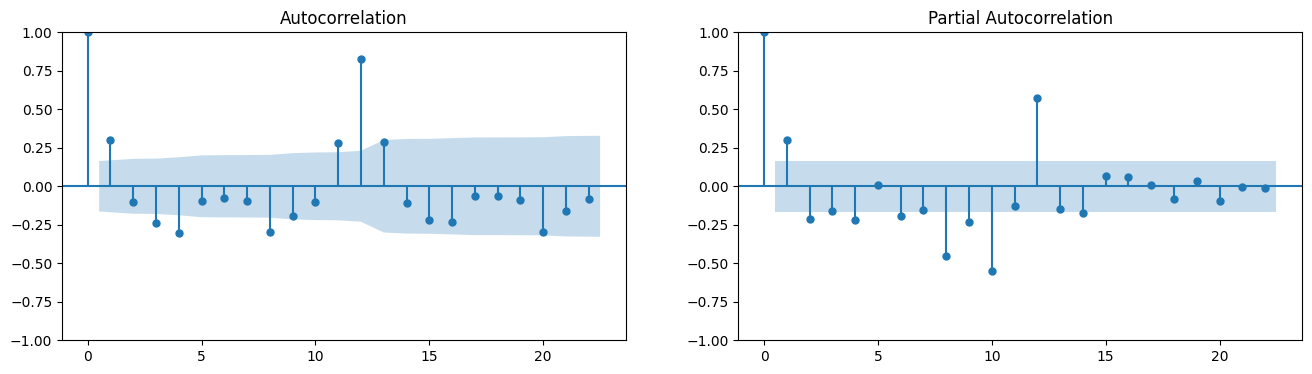

In [31]:
# ... (previous code remains the same)

# After running the code up to step 4, let's interpret the results:

# 1. Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title('Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

# 2. Check for stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

print("Checking for stationarity in the original time series:")
test_stationarity(ts)

# 3. Decompose the time series
decomposition = seasonal_decompose(ts, model='multiplicative', period=12)
decomposition.plot()
plt.tight_layout()
plt.show()

# 4. ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
plot_acf(ts, ax=ax1)
plot_pacf(ts, ax=ax2)
plt.show()

print("Testing for stationarity in the differenced time series:")
# 5. Determine the order of differencing (d)
ts_diff = ts.diff().dropna()
test_stationarity(ts_diff)

print("\nTesting for stationarity in the second-order differenced time series:")
# If still not stationary, try second-order differencing
ts_diff2 = ts_diff.diff().dropna()
test_stationarity(ts_diff2)

# Plot ACF and PACF of differenced series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
plot_acf(ts_diff, ax=ax1)
plot_pacf(ts_diff, ax=ax2)
plt.show()

c:\Users\wesst\toolkit\tool-kit\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -508.197
Date:                            Wed, 25 Sep 2024   AIC                           1020.393
Time:                                    01:00:28   BIC                           1026.144
Sample:                                01-31-1949   HQIC                          1022.730
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3076      0.073     -4.186      0.000      -0.452      -0.164
sigma2       137.0108     14.623   

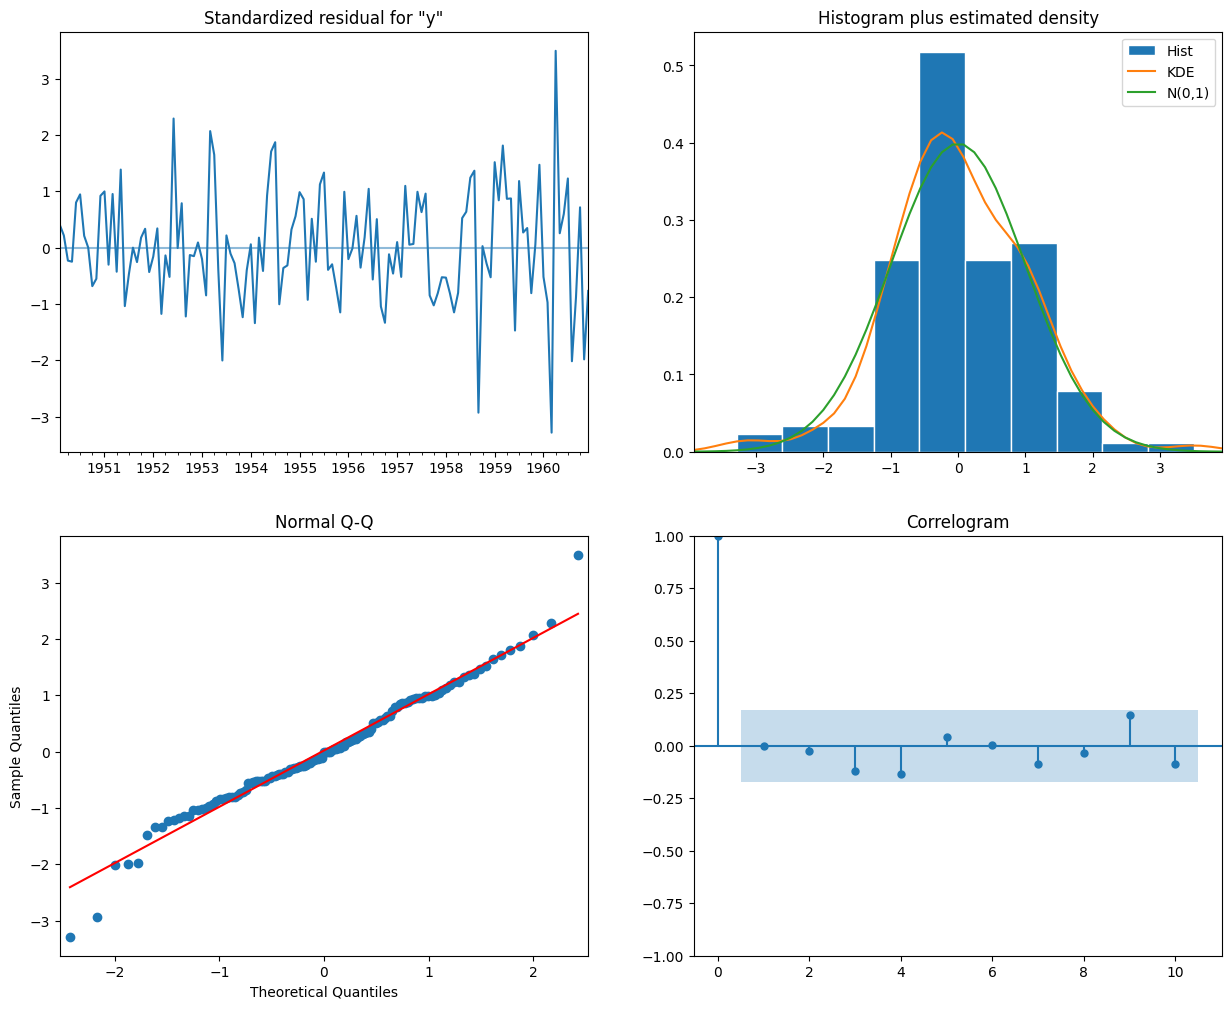

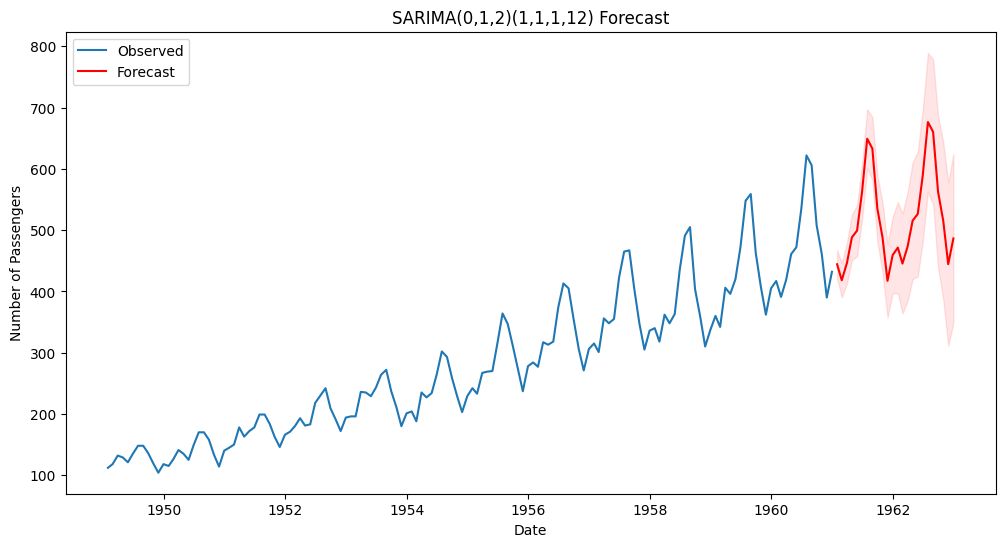

1961-01-31    444.307609
1961-02-28    418.212986
1961-03-31    446.242093
1961-04-30    488.233139
1961-05-31    499.235893
1961-06-30    562.235046
1961-07-31    649.235307
1961-08-31    633.235226
1961-09-30    535.235251
1961-10-31    488.235244
1961-11-30    417.235246
1961-12-31    459.235245
1962-01-31    471.542854
1962-02-28    445.448231
1962-03-31    473.477338
1962-04-30    515.468384
1962-05-31    526.471139
1962-06-30    589.470291
1962-07-31    676.470552
1962-08-31    660.470472
1962-09-30    562.470496
1962-10-31    515.470489
1962-11-30    444.470491
1962-12-31    486.470490
Freq: ME, Name: predicted_mean, dtype: float64


In [10]:
# ... (previous code remains the same)

# Fit the SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the model
model = SARIMAX(ts, order=(1, 1, 0), seasonal_order=(0, 1, 0, 12), freq='ME')
results = model.fit()

# Print the model summary
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecast
forecast_steps = 24  # Forecasting 2 years ahead
forecast = results.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='r', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='r', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('SARIMA(0,1,2)(1,1,1,12) Forecast')
plt.legend()
plt.show()

# Calculate and print forecast values
print(forecast.predicted_mean)

Cross-validation RMSE scores: [10.39442876300241, 14.989545635078148, 20.604547300406036, 45.27909858680512, 20.58155346475602]
Mean RMSE: 22.369834750009545
Standard deviation of RMSE: 12.074995447224373


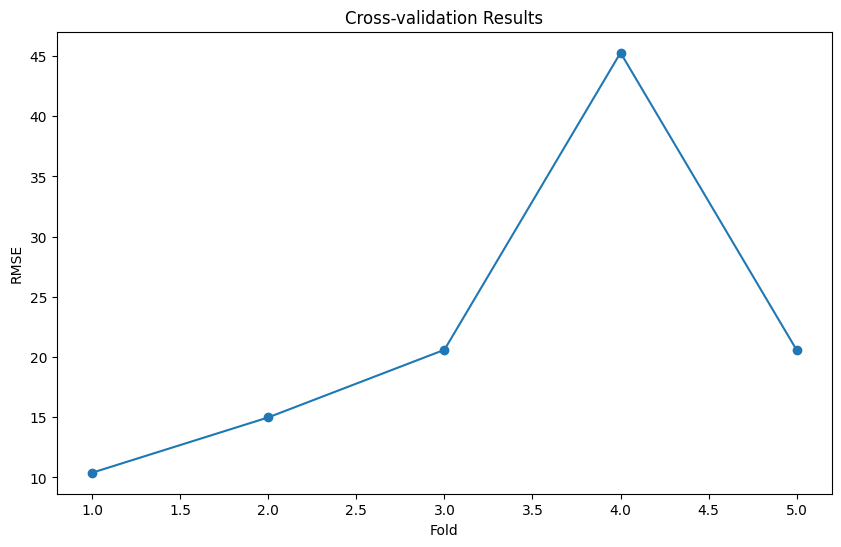

Cross-validation MAPE scores: [np.float64(2.5039097222716022), np.float64(2.80711821953974), np.float64(5.158282236345186), np.float64(10.058234738624563), np.float64(3.5534498642019274)]
Mean MAPE: 4.816198956196604
Standard deviation of MAPE: 2.7775378410339204


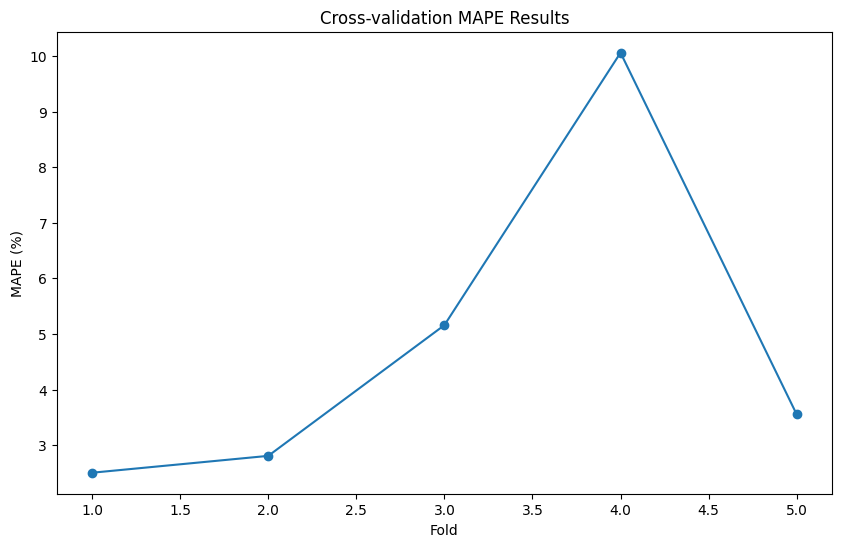

In [11]:
# ... (previous code remains the same)
#ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# Define a function to perform time series cross-validation
def time_series_cv(data, n_splits, horizon):
    for i in range(n_splits):
        train_size = len(data) - (n_splits - i) * horizon
        train, test = data[:train_size], data[train_size:train_size+horizon]
        yield train, test

# Set parameters
n_splits = 5  # Number of splits for cross-validation
horizon = 12  # Forecast horizon (12 months)

# Perform cross-validation
cv_scores = []

for train, test in time_series_cv(ts, n_splits, horizon):
    # Fit the model
    model = SARIMAX(train, order=(0, 1, 2), seasonal_order=(1, 1, 1, 12))
    results = model.fit(disp=False)
    
    # Make predictions
    predictions = results.forecast(steps=len(test))
    
    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, predictions))
    cv_scores.append(rmse)

# Print cross-validation results
print("Cross-validation RMSE scores:", cv_scores)
print("Mean RMSE:", np.mean(cv_scores))
print("Standard deviation of RMSE:", np.std(cv_scores))

# Plot cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-validation Results')
plt.show()

# Calculate percentage error
mape_scores = []
for train, test in time_series_cv(ts, n_splits, horizon):
    model = SARIMAX(train, order=(0, 1, 2), seasonal_order=(1, 1, 1, 12), freq='ME')
    results = model.fit(disp=False)
    predictions = results.forecast(steps=len(test))
    mape = np.mean(np.abs((test - predictions) / test)) * 100
    mape_scores.append(mape)

print("Cross-validation MAPE scores:", mape_scores)
print("Mean MAPE:", np.mean(mape_scores))
print("Standard deviation of MAPE:", np.std(mape_scores))

# Plot MAPE results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mape_scores) + 1), mape_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('MAPE (%)')
plt.title('Cross-validation MAPE Results')
plt.show()

In [12]:
AirPassengersDF

,unique_id,y
ds,,
1949-01-31,1.0,112.0
1949-02-28,1.0,118.0
1949-03-31,1.0,132.0
1949-04-30,1.0,129.0
1949-05-31,1.0,121.0
...,...,...
1960-08-31,1.0,606.0
1960-09-30,1.0,508.0
1960-10-31,1.0,461.0


In [35]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string
season_length = 12 # Monthly data 


models = [AutoARIMA(season_length=season_length, trace=True, nmodels=150)]
sf = StatsForecast(df=AirPassengersDF.reset_index(),
                   models=models,
                   freq='ME', 

                   n_jobs=-1)
sf.fit(df = AirPassengersDF.reset_index())

arima_string(sf.fitted_[0,0].model_, padding=True)


ARIMA(2,1,2)(1,1,1)[12]                   :inf

ARIMA(0,1,0)(0,1,0)[12]                   :1031.5391159191217

ARIMA(1,1,0)(1,1,0)[12]                   :1020.5904301188239

ARIMA(0,1,1)(0,1,1)[12]                   :1021.1963416590766

ARIMA(1,1,0)(0,1,0)[12]                   :1020.4959244379531

ARIMA(1,1,0)(0,1,1)[12]                   :1021.1126379659631

ARIMA(1,1,0)(1,1,1)[12]                   :1022.6631739335072

ARIMA(2,1,0)(0,1,0)[12]                   :1022.5894034707084

ARIMA(1,1,1)(0,1,0)[12]                   :1022.5891052973988

ARIMA(0,1,1)(0,1,0)[12]                   :1020.7335094961811

ARIMA(2,1,1)(0,1,0)[12]                   :1020.4084568897604

ARIMA(2,1,1)(1,1,0)[12]                   :1023.8452423495294

ARIMA(2,1,1)(0,1,1)[12]                   :inf

ARIMA(2,1,1)(1,1,1)[12]                   :1030.2774069298796

ARIMA(3,1,1)(0,1,0)[12]                   :1025.6761033707246

ARIMA(2,1,2)(0,1,0)[12]                   :inf

ARIMA(1,1,2)(0,1,0)[12]             

'ARIMA(2,1,1)(0,1,0)[12]                   '

In [14]:
df

,unique_id,y
ds,,
1949-01-31,1.0,112.0
1949-02-28,1.0,118.0
1949-03-31,1.0,132.0
1949-04-30,1.0,129.0
1949-05-31,1.0,121.0
...,...,...
1960-08-31,1.0,606.0
1960-09-30,1.0,508.0
1960-10-31,1.0,461.0


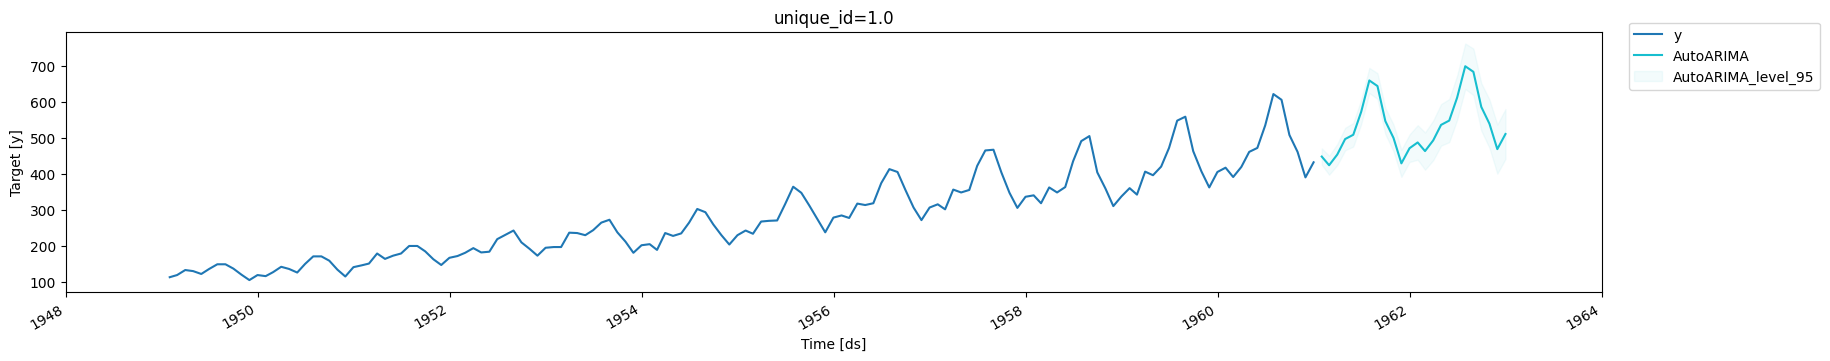

In [15]:
from utilsforecast.plotting import plot_series
plot_series(AirPassengersDF.reset_index(), fcst, level=[95])


In [16]:
print(df)

            unique_id      y
ds                          
1949-01-31        1.0  112.0
1949-02-28        1.0  118.0
1949-03-31        1.0  132.0
1949-04-30        1.0  129.0
1949-05-31        1.0  121.0
...               ...    ...
1960-08-31        1.0  606.0
1960-09-30        1.0  508.0
1960-10-31        1.0  461.0
1960-11-30        1.0  390.0
1960-12-31        1.0  432.0

[144 rows x 2 columns]


In [17]:
import numpy as np

def select_random_dates(df, num_dates):
    """
    Selects num_dates random dates from the 'ds' index of the DataFrame df.
    Returns a list of dates.
    """
    # Ensure the index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("The DataFrame index must be a DatetimeIndex.")

    # Get the unique dates in the DataFrame index
    dates = df.index.unique()

    # Check that num_dates is not greater than the number of available dates
    if num_dates > len(dates):
        raise ValueError("num_dates is greater than the number of available dates.")

    # Select random dates
    random_dates = np.random.choice(dates, size=num_dates, replace=False)
    # Sort the dates
    random_dates = np.sort(random_dates)
    return random_dates.tolist()


In [19]:
df

,unique_id,y
ds,,
1949-01-31,1.0,112.0
1949-02-28,1.0,118.0
1949-03-31,1.0,132.0
1949-04-30,1.0,129.0
1949-05-31,1.0,121.0
...,...,...
1960-08-31,1.0,606.0
1960-09-30,1.0,508.0
1960-10-31,1.0,461.0


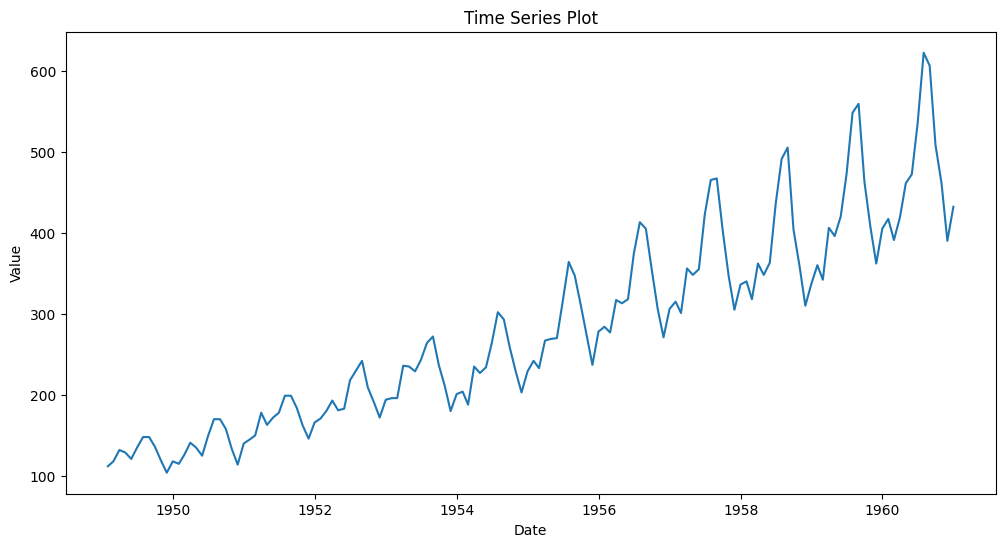

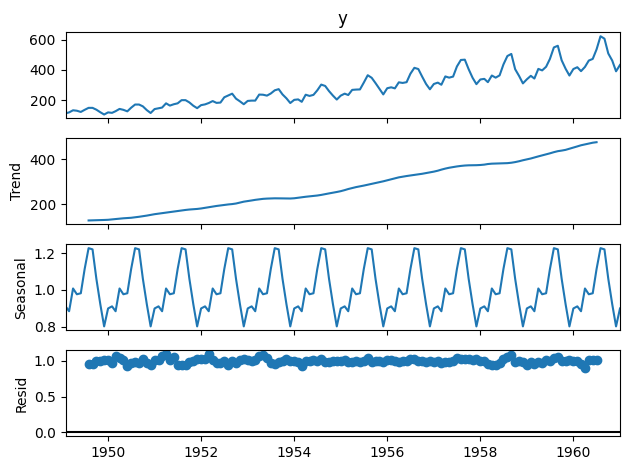

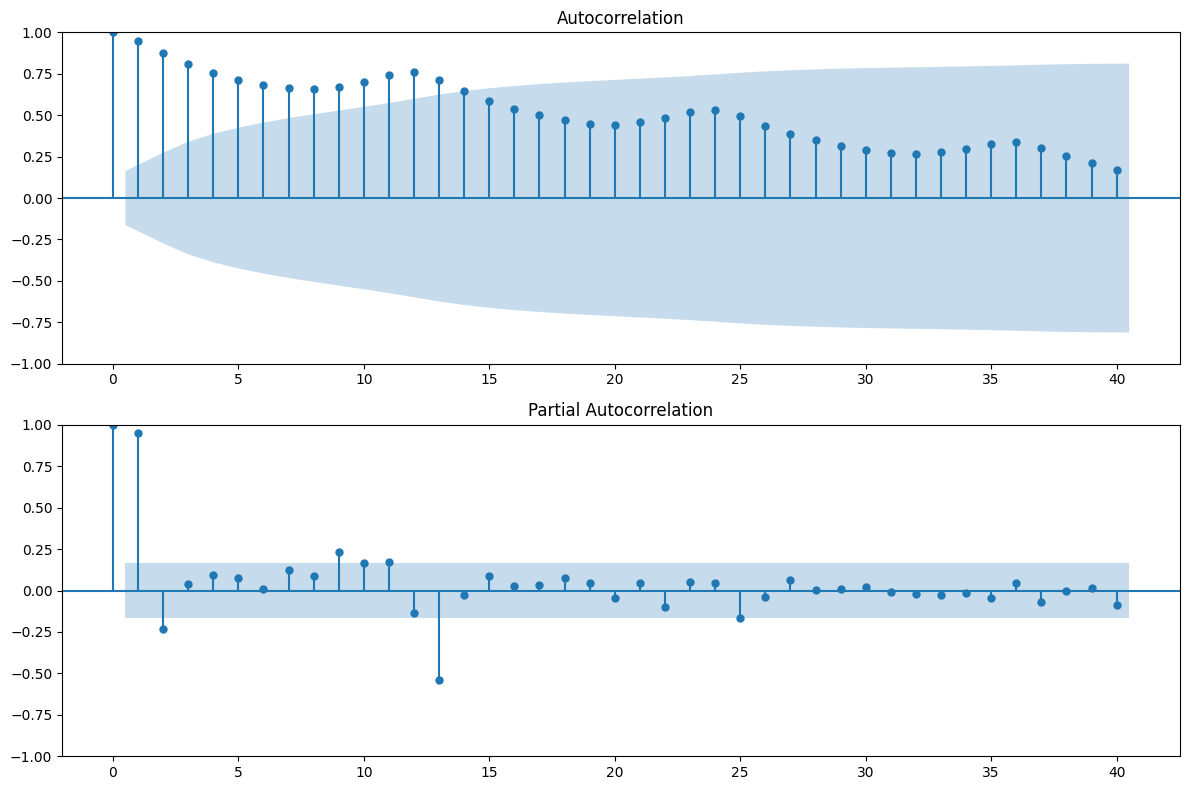

Testing stationarity of original series:
ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
Weak evidence against null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Testing stationarity of differenced series:
ADF Statistic: -2.8292668241699923
p-value: 0.054213290283826474
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
Weak evidence against null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:        

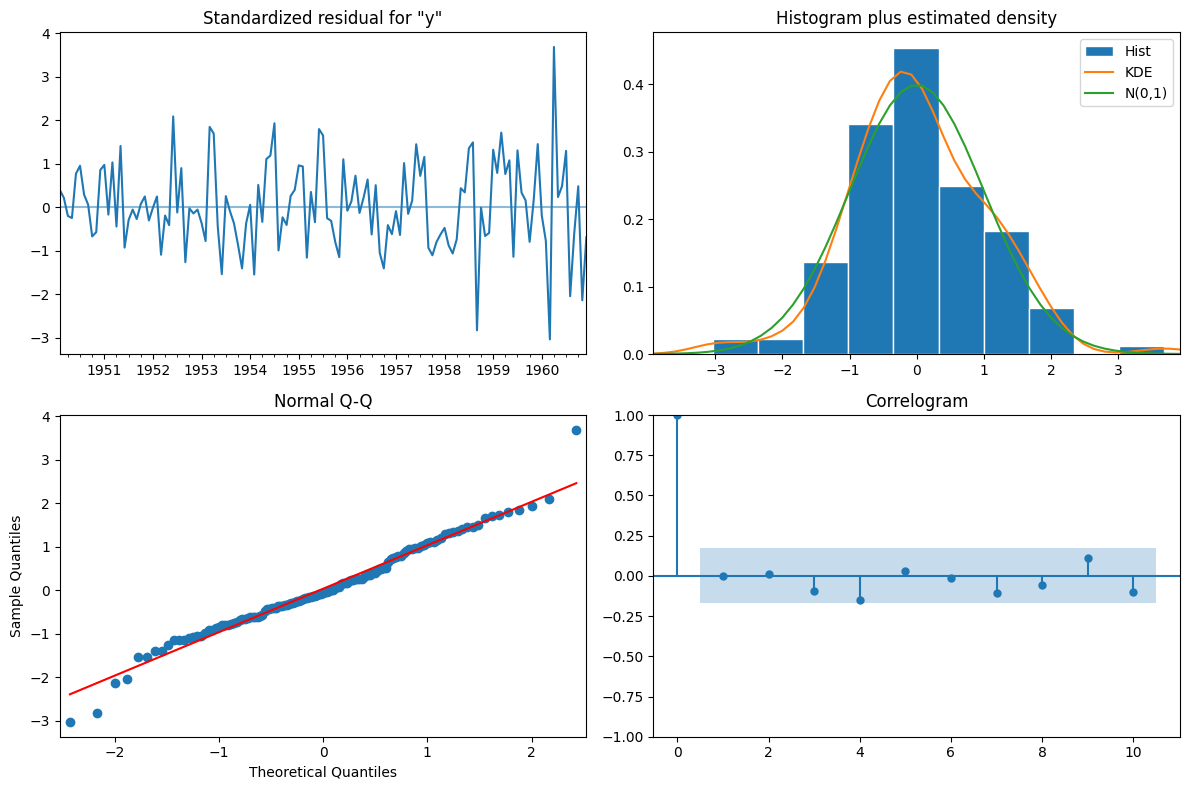

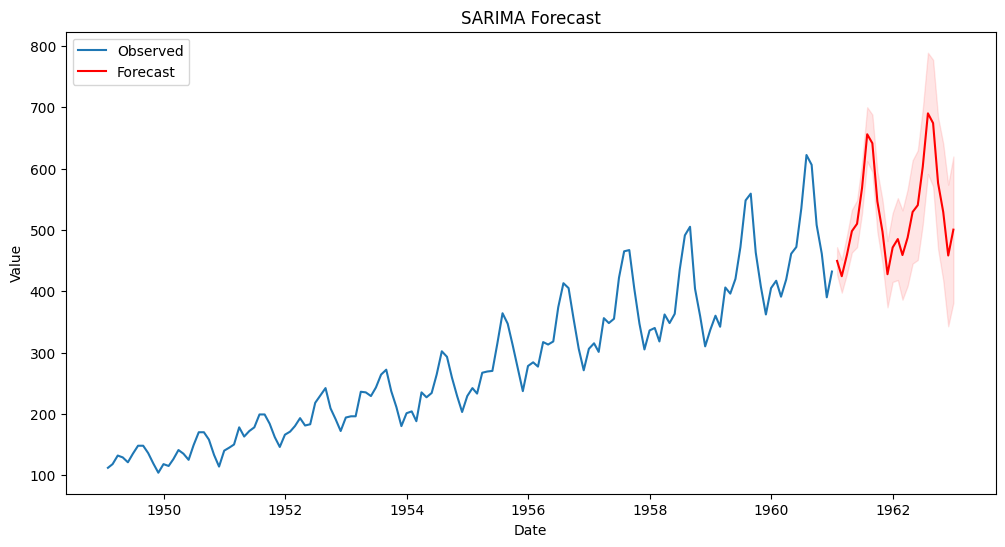

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -505.725
Date:                            Wed, 25 Sep 2024   AIC                           1023.450
Time:                                    01:01:17   BIC                           1040.701
Sample:                                01-31-1949   HQIC                          1030.460
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
promo         -6.2442      6.105     -1.023      0.306     -18.209       5.721
ar.L1         -0.2466      0.361   

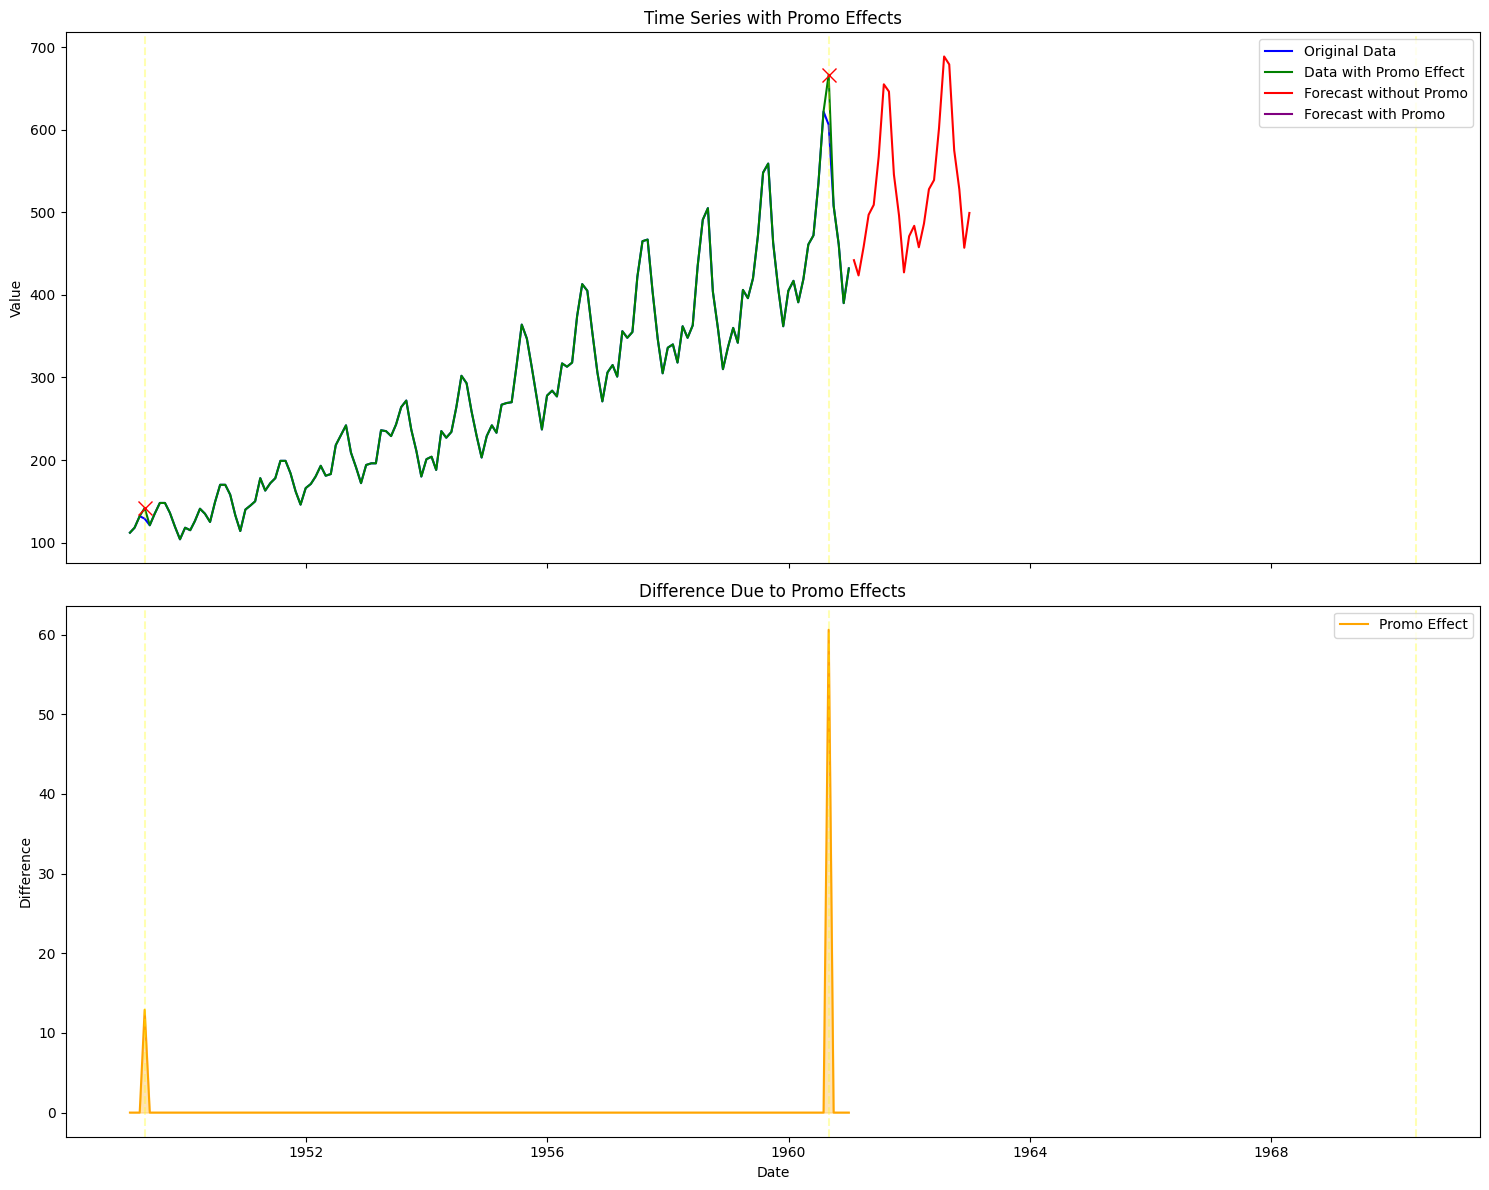

Promotional Periods and Their Effects:
Date: 1949-04-30
  Without Promo: 129.00
  With Promo: 141.90
  Difference: 12.90
  Percentage Increase: 10.00%

Date: 1960-08-31
  Without Promo: 606.00
  With Promo: 666.60
  Difference: 60.60
  Percentage Increase: 10.00%

Historical MAPE (with vs without Promo): 0.14%


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings

warnings.filterwarnings("ignore")
df = AirPassengersDF.reset_index()
# Load and prepare the data
# df = pd.read_csv('your_data.csv')  # Replace with your actual file name
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)
ts = df['y']

# 1. Exploratory Data Analysis
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(ts, model='multiplicative', period=12)
decomposition.plot()
plt.tight_layout()
plt.show()

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(ts, ax=ax1, lags=40)
plot_pacf(ts, ax=ax2, lags=40)
plt.tight_layout()
plt.show()

# 2. Check for stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

print("Testing stationarity of original series:")
test_stationarity(ts)

# Differencing if necessary
ts_diff = ts.diff().dropna()
print("\nTesting stationarity of differenced series:")
test_stationarity(ts_diff)

# 3. SARIMA Modeling
# You may need to adjust these parameters based on your ACF/PACF plots
p, d, q = 1, 1, 1
P, D, Q, m = 1, 1, 1, 12  # Assuming monthly data with yearly seasonality

model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, m))
results = model.fit()
print(results.summary())

# 4. Diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

# 5. Forecasting
forecast_steps = 24  # Forecasting 2 years ahead
forecast = results.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='r', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='r', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()
# 6. SARIMAX with Exogenous Variables (Promotions)
# Create promotional data
# Create promotional data with the same frequency as ts (monthly)
# Create promotional data with the same frequency as ts (monthly)
forecast_steps = 24  # Ensure this is defined before use
date_range = pd.date_range(start=ts.index.min(), end=ts.index.max() + pd.DateOffset(months=forecast_steps), freq='M')
promo_data = pd.DataFrame({'date': date_range})
promo_data['promo'] = 0

# Convert promo dates to datetime and get the corresponding months
past_promos = pd.to_datetime(['1960-08-31', '1949-04-30', '2021-01-10', '2021-06-20', '2022-02-14'])
future_promos = pd.to_datetime(['1961-01-31'])

# Get the unique months for all promos
promo_months = past_promos.to_period('M').unique()
future_promo_months = future_promos.to_period('M').unique()

# Corrected line using union
all_promo_months = promo_months.union(future_promo_months)

# Set 'promo' variable to 1 for months with promos
promo_data['promo'] = promo_data['date'].dt.to_period('M').isin(all_promo_months).astype(int)

# Merge with original data
df_with_promos = ts.to_frame().reset_index().merge(promo_data, left_on='ds', right_on='date', how='left')
df_with_promos.set_index('ds', inplace=True)

# Apply the promo effect to historical data
df_with_promos['y_with_promo'] = df_with_promos['y'] * (1 + 0.10 * df_with_promos['promo'])


# Proceed with modeling and forecasting as before...


# Fit SARIMAX model with original data and promo as exogenous variable
model_sarimax = SARIMAX(df_with_promos['y'], exog=df_with_promos['promo'],
                        order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust orders as needed
results_sarimax = model_sarimax.fit()
print(results_sarimax.summary())

# Forecast
forecast_steps = 24  # Forecasting 2 years ahead
future_exog = promo_data.loc[promo_data['date'] > ts.index.max(), 'promo'][:forecast_steps]
forecast_sarimax = results_sarimax.get_forecast(steps=forecast_steps, exog=future_exog)

# Create forecast with promo effects
forecast_with_promo = forecast_sarimax.predicted_mean * (1 + 0.10 * future_exog)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Plot historical data and forecasts
ax1.plot(df_with_promos.index, df_with_promos['y'], label='Original Data', color='blue')
ax1.plot(df_with_promos.index, df_with_promos['y_with_promo'], label='Data with Promo Effect', color='green')
ax1.plot(forecast_sarimax.predicted_mean.index, forecast_sarimax.predicted_mean, label='Forecast without Promo', color='red')
ax1.plot(forecast_with_promo.index, forecast_with_promo, label='Forecast with Promo', color='purple')

# Highlight promo periods and add X marks
all_promos = df_with_promos[df_with_promos['promo'] == 1].index.tolist() + future_exog[future_exog == 1].index.tolist()
for date in all_promos:
    ax1.axvline(x=date, color='yellow', alpha=0.3, linestyle='--')
    if date in df_with_promos.index:
        ax1.plot(date, df_with_promos.loc[date, 'y_with_promo'], 'rx', markersize=10)
    elif date in forecast_with_promo.index:
        ax1.plot(date, forecast_with_promo.loc[date], 'rx', markersize=10)

ax1.set_ylabel('Value')
ax1.set_title('Time Series with Promo Effects')
ax1.legend()

# Plot difference between with and without promo
historical_diff = df_with_promos['y_with_promo'] - df_with_promos['y']
forecast_diff = forecast_with_promo - forecast_sarimax.predicted_mean
combined_diff = pd.concat([historical_diff, forecast_diff])

ax2.plot(combined_diff.index, combined_diff, label='Promo Effect', color='orange')
ax2.fill_between(combined_diff.index, 0, combined_diff, alpha=0.3, color='orange')

# Highlight promo periods in difference plot
for date in all_promos:
    ax2.axvline(x=date, color='yellow', alpha=0.3, linestyle='--')

ax2.set_xlabel('Date')
ax2.set_ylabel('Difference')
ax2.set_title('Difference Due to Promo Effects')
ax2.legend()

plt.tight_layout()
plt.show()

# Print out the dates and values for promo periods
print("Promotional Periods and Their Effects:")
all_data = pd.concat([df_with_promos, pd.DataFrame({'y': forecast_sarimax.predicted_mean, 'y_with_promo': forecast_with_promo}, index=forecast_with_promo.index)])
promo_comparison = all_data[all_data['promo'] == 1]
for date, row in promo_comparison.iterrows():
    print(f"Date: {date.date()}")
    print(f"  Without Promo: {row['y']:.2f}")
    print(f"  With Promo: {row['y_with_promo']:.2f}")
    print(f"  Difference: {row['y_with_promo'] - row['y']:.2f}")
    print(f"  Percentage Increase: {((row['y_with_promo'] / row['y']) - 1) * 100:.2f}%")
    print()

# Calculate overall MAPE
historical_mape = mean_absolute_percentage_error(df_with_promos['y'], df_with_promos['y_with_promo']) * 100
# forecast_mape = mean_absolute_percentage_error(forecast_sarimax.predicted_mean, forecast_with_promo) * 100

print(f"Historical MAPE (with vs without Promo): {historical_mape:.2f}%")
# print(f"Forecast MAPE (with vs without Promo): {forecast_mape:.2f}%")

In [21]:
forecast_with_promo

1961-01-31 00:00:00   NaN
1961-02-28 00:00:00   NaN
1961-03-31 00:00:00   NaN
1961-04-30 00:00:00   NaN
1961-05-31 00:00:00   NaN
1961-06-30 00:00:00   NaN
1961-07-31 00:00:00   NaN
1961-08-31 00:00:00   NaN
1961-09-30 00:00:00   NaN
1961-10-31 00:00:00   NaN
1961-11-30 00:00:00   NaN
1961-12-31 00:00:00   NaN
1962-01-31 00:00:00   NaN
1962-02-28 00:00:00   NaN
1962-03-31 00:00:00   NaN
1962-04-30 00:00:00   NaN
1962-05-31 00:00:00   NaN
1962-06-30 00:00:00   NaN
1962-07-31 00:00:00   NaN
1962-08-31 00:00:00   NaN
1962-09-30 00:00:00   NaN
1962-10-31 00:00:00   NaN
1962-11-30 00:00:00   NaN
1962-12-31 00:00:00   NaN
144                   NaN
145                   NaN
146                   NaN
147                   NaN
148                   NaN
149                   NaN
150                   NaN
151                   NaN
152                   NaN
153                   NaN
154                   NaN
155                   NaN
156                   NaN
157                   NaN
158         

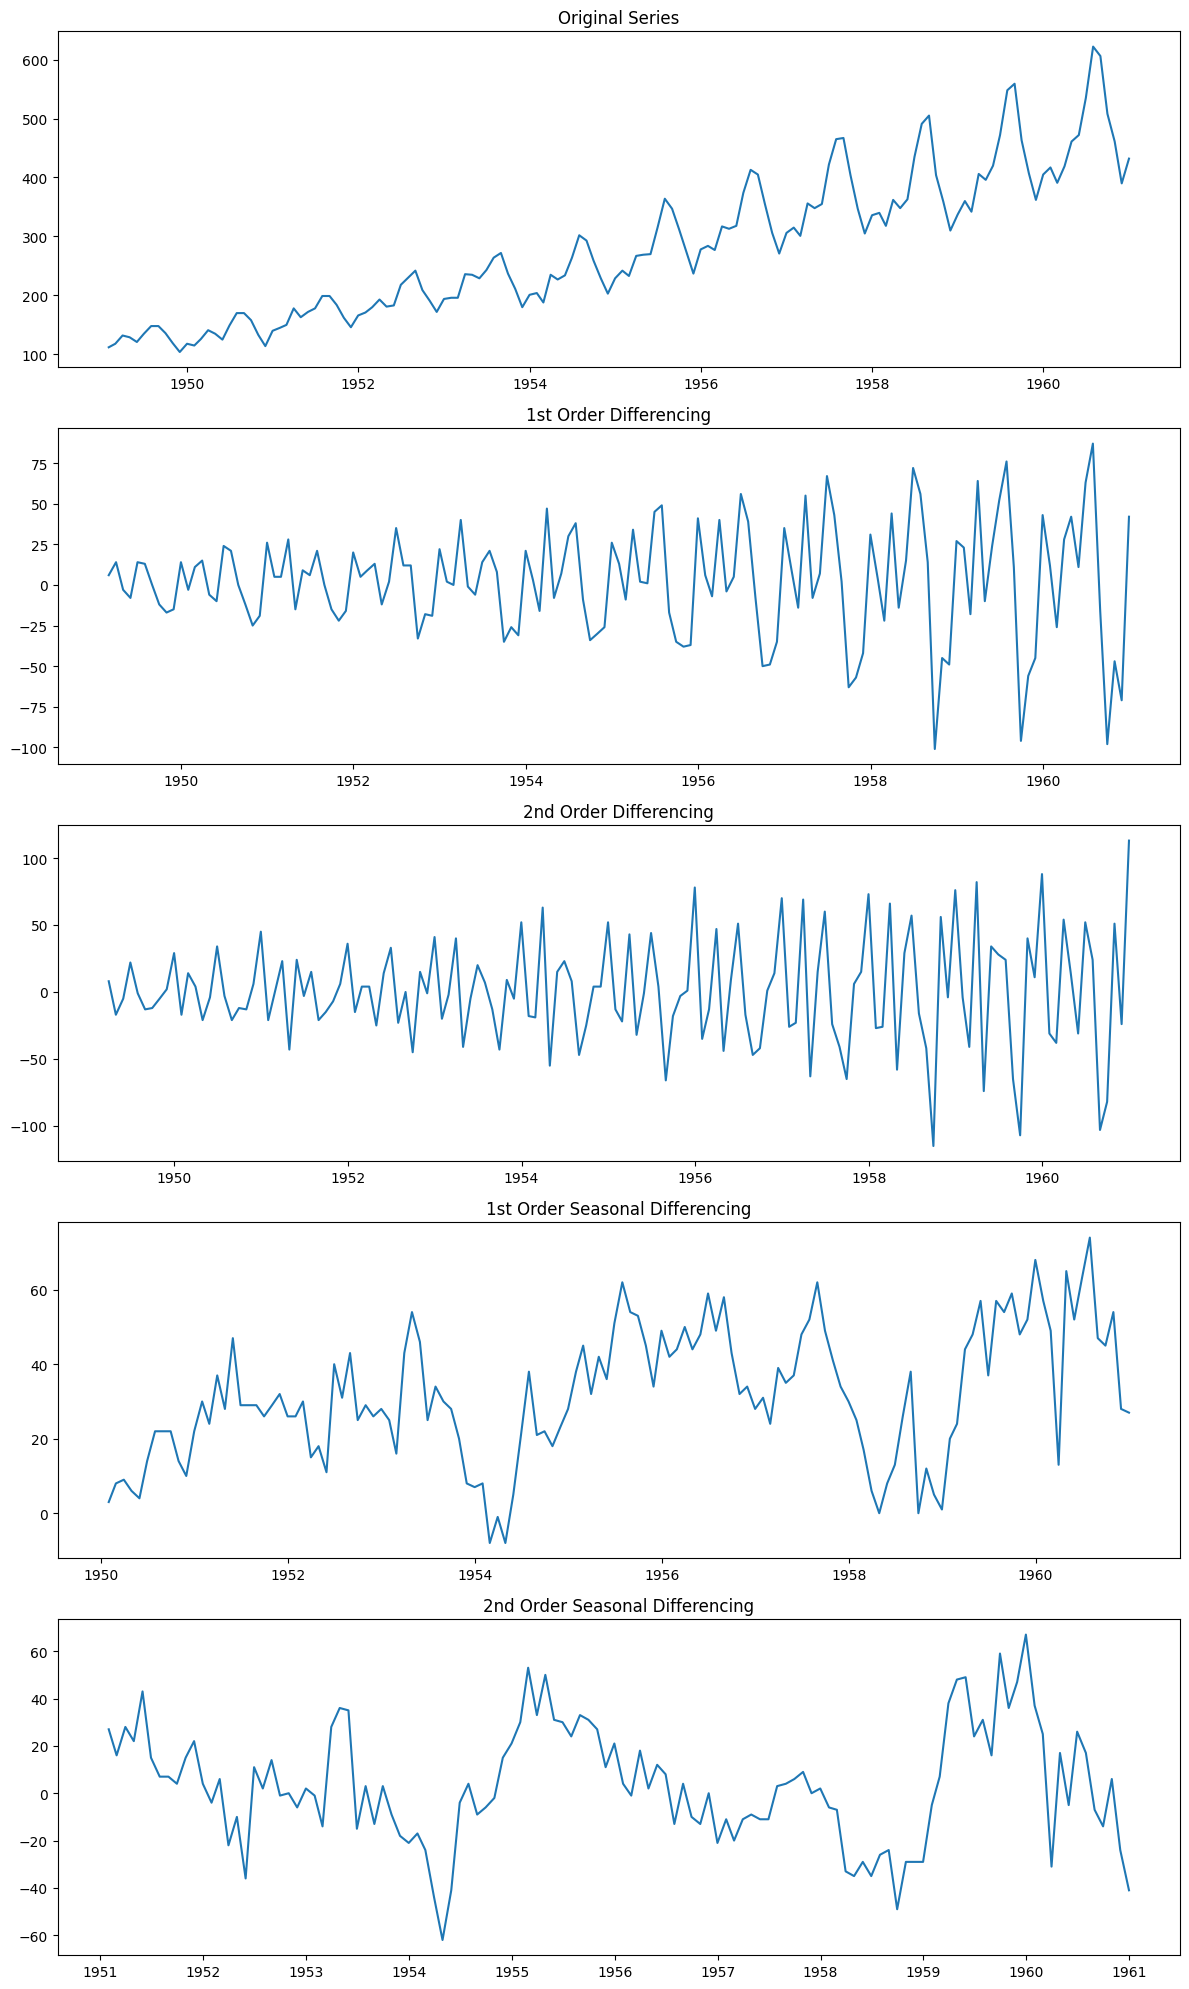

Original Series:
ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598

1st Order Differencing:
ADF Statistic: -2.8292668241699923
p-value: 0.054213290283826474
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598

2nd Order Differencing:
ADF Statistic: -16.384231542468516
p-value: 2.7328918500141235e-29
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598

1st Order Seasonal Differencing:
ADF Statistic: -3.383020726492481
p-value: 0.011551493085514954
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598

2nd Order Seasonal Differencing:
ADF Statistic: -2.765380673627128
p-value: 0.06339157882390167
Critical Values:
	1%: -3.492995948509562
	5%: -2.888954648057252
	10%: -2.58139291903223


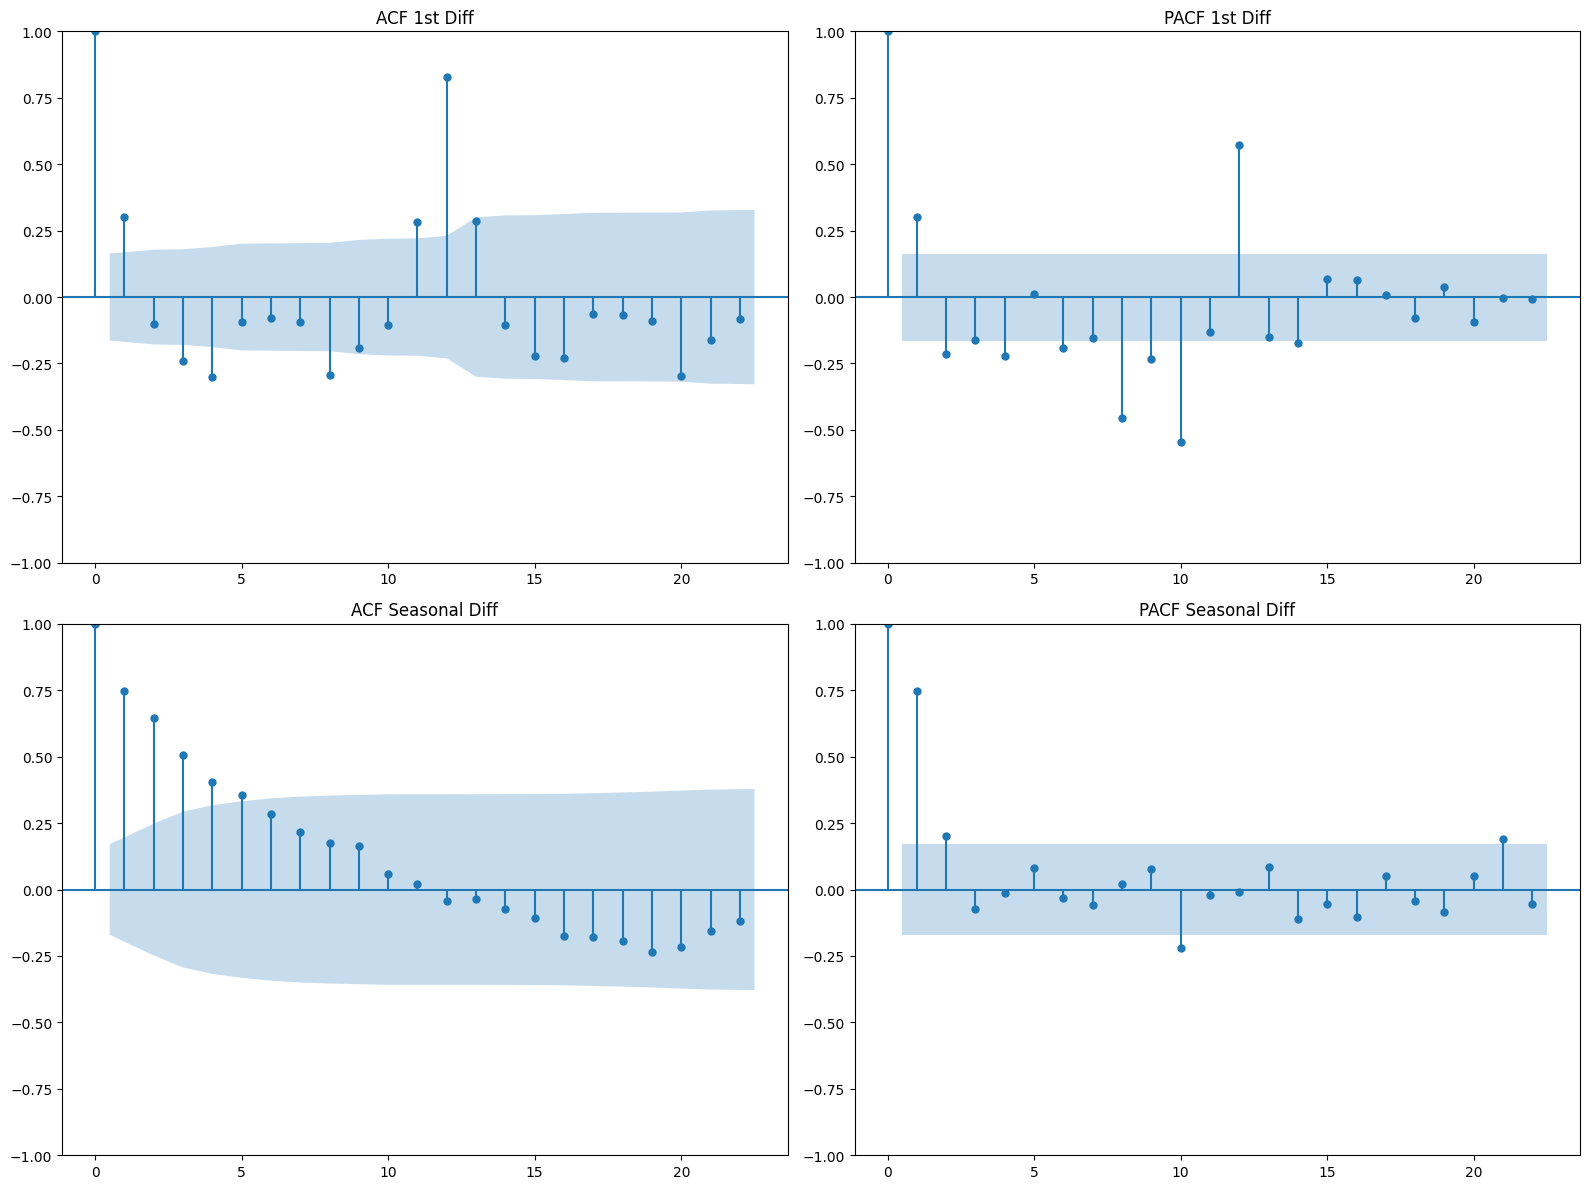

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Assume 'ts' is your original time series
# Regular differencing
ts_diff1 = ts.diff().dropna()
ts_diff2 = ts_diff1.diff().dropna()

# Seasonal differencing (assuming monthly data)
ts_seasonal_diff1 = ts.diff(12).dropna()
ts_seasonal_diff2 = ts_seasonal_diff1.diff(12).dropna()

# Plot original and differenced series
fig, axes = plt.subplots(5, 1, figsize=(12, 20))
axes[0].plot(ts); axes[0].set_title('Original Series')
axes[1].plot(ts_diff1); axes[1].set_title('1st Order Differencing')
axes[2].plot(ts_diff2); axes[2].set_title('2nd Order Differencing')
axes[3].plot(ts_seasonal_diff1); axes[3].set_title('1st Order Seasonal Differencing')
axes[4].plot(ts_seasonal_diff2); axes[4].set_title('2nd Order Seasonal Differencing')
plt.tight_layout()
plt.show()

# Test stationarity
print("Original Series:")
test_stationarity(ts)
print("\n1st Order Differencing:")
test_stationarity(ts_diff1)
print("\n2nd Order Differencing:")
test_stationarity(ts_diff2)
print("\n1st Order Seasonal Differencing:")
test_stationarity(ts_seasonal_diff1)
print("\n2nd Order Seasonal Differencing:")
test_stationarity(ts_seasonal_diff2)

# Plot ACF and PACF for differenced series
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plot_acf(ts_diff1, ax=axes[0, 0]); axes[0, 0].set_title('ACF 1st Diff')
plot_pacf(ts_diff1, ax=axes[0, 1]); axes[0, 1].set_title('PACF 1st Diff')
plot_acf(ts_seasonal_diff1, ax=axes[1, 0]); axes[1, 0].set_title('ACF Seasonal Diff')
plot_pacf(ts_seasonal_diff1, ax=axes[1, 1]); axes[1, 1].set_title('PACF Seasonal Diff')
plt.tight_layout()
plt.show()